In [81]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt
import scipy



In [82]:
jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

In [83]:
#CODE for comparison -- 1.1
na = 20
nb = 5
g2 = 1 #chlling
eps = -4
Kb = 10
T = 3
tsave = jnp.linspace(0, T, 50)

a, b = dq.destroy(na, nb)

H = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)# Hamiltonian

#initial state and save time
psi0 = dq.fock((na,nb), (0,0))  # coherent state

jump_ops = [jnp.sqrt(Kb)*b]
res_2_mode = dq.mesolve(H,jump_ops, psi0, tsave)


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

In [48]:
# parameters
na = 20  # number of Fock states
nb = 5 
T = 3 # time of evolution
omega = jnp.pi/T  # detuning2=1
Kb = 10
g2 = 1

|          |   0.3% ◆ elapsed 1.66ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 119.38ms ◆ remaining 0.00ms 


|          |   0.3% ◆ elapsed 1.49ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 117.27ms ◆ remaining 0.00ms 


|          |   0.3% ◆ elapsed 1.73ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 121.66ms ◆ remaining 0.00ms 


|          |   0.3% ◆ elapsed 2.92ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 120.95ms ◆ remaining 0.00ms 


|          |   0.3% ◆ elapsed 1.90ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 117.82ms ◆ remaining 0.00ms 


In [99]:
def optimize(values):
    # operators
    a, b = dq.destroy(na, nb)

    H_0 = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) 

    times = [0.0, 1, 2.0, 3.0]
    qarray = b + dq.dag(b)
    H_d = dq.pwc(times, values, qarray)

    H = H_0 + H_d

    # initial state and save time
    psi0 = dq.fock((na,nb), (0,0))  # coherent state
    t_save = jnp.linspace(0, T, 50)  # save times

    jump_ops = [jnp.sqrt(Kb)*b]
    res = dq.mesolve(H,jump_ops, psi0, t_save)

    trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a

    dq.plot.wigner_gif(trace_a, fps=40)
    trace_a_2mode = dq.ptrace(res_2_mode.states, 0,res_2_mode.states.dims) # trace of a
    trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a
    fidelity_plot = dq.fidelity(trace_a, trace_a_2mode)

    for t in range(50):
        if tsave[t]>1 and fidelity_plot[t]>0.995:
            print(tsave[t])
            print(values)
            return(tsave[t])

        return(3)
values = [-10.0, -6.0, -4.0]
optimize(values)
xopt = scipy.optimize.fmin(optimize, values, xtol=1e-2, disp=True)
print(xopt)

|██████████| 100.0% ◆ elapsed 153.08ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 28.48it/s]
|██████████| 100.0% ◆ elapsed 149.62ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.31it/s]
|██████████| 100.0% ◆ elapsed 149.57ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 30.42it/s]
|██████████| 100.0% ◆ elapsed 153.98ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.27it/s]
|██████████| 100.0% ◆ elapsed 157.01ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 34.61it/s]
|██████████| 100.0% ◆ elapsed 152.99ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 29.25it/s]
|██████████| 100.0% ◆ elapsed 152.94ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.07it/s]
|██████████| 100.0% ◆ elapsed 149.99ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.13it/s]
|██████████| 100.0% ◆ elapsed 155.75ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 28.11it/s]
|██████████| 100.0% ◆ elapsed 164.04m

Optimization terminated successfully.
         Current function value: 3.000000
         Iterations: 7
         Function evaluations: 34
[-10.  -6.  -4.]


(50,)


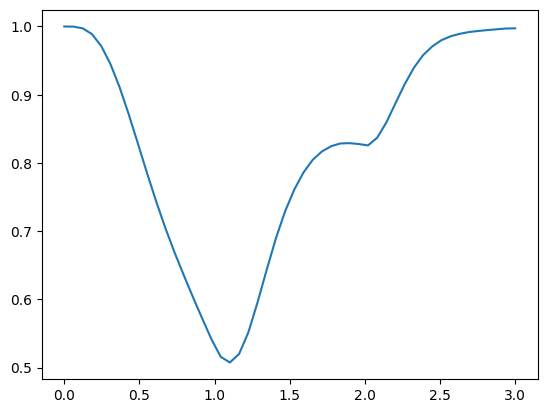

In [100]:
trace_a_2mode = dq.ptrace(res_2_mode.states, 0,res_2_mode.states.dims) # trace of a
trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a
fidelity_plot = dq.fidelity(trace_a, trace_a_2mode)
print(fidelity_plot.shape)
plt.plot(tsave, fidelity_plot)